 ## <u>Final Project - Optimizing Marketing Campaigns Using Customer Data</u>

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from yellowbrick.cluster import KElbowVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import mutual_info_classif

In [2]:
# Load the dataset
file_path = "marketing_campaign.csv"

In [3]:
# Load the dataset into a Python environment
df = pd.read_csv(file_path, sep=';')

In [4]:
# Checking the top 5 rows of dataset
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


#### The above code displays the first 5 rows of the dataset.

In [5]:
# Checking the datatype and other information related to the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

#### Only three categorical variables- Marital Status, Education, and Dt Customer.

In [6]:
# Checking the total number of columns and rows in the dataset
df.shape

(2240, 29)

#### There are 2240 rows and 29 columns in the dataset.

## Data PreProcessing

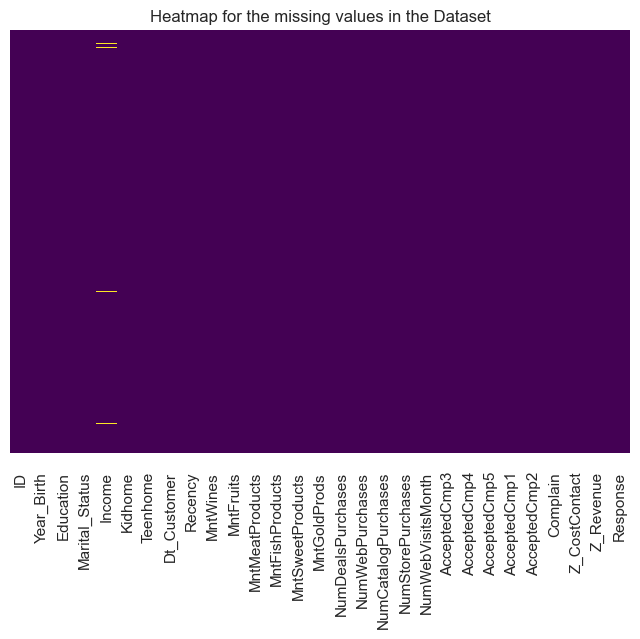

In [7]:
# Checking for missing values/data
sns.set(style="whitegrid")
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title("Heatmap for the missing values in the Dataset");

#### From the above figure we can see that only "Income" column has missing values

In [8]:
# checking the number of missing values in the Income column
print("Number of missing values in the Income column: ", df['Income'].isnull().sum())

Number of missing values in the Income column:  24


In [9]:
# checking for duplicate rows
print("Number of duplicate rows in the dataset: ",df.duplicated().sum())

Number of duplicate rows in the dataset:  0


In [10]:
# Function to find columns with constant values
def identify_consts(df):
  constant_features = [
      feat for feat in df.columns if len(df[feat].unique()) == 1
  ]
  return constant_features

In [11]:
# printing columns with constant values
identify_consts(df)

['Z_CostContact', 'Z_Revenue']

In [12]:
# Removing columns with constant values
df.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

#### Removing features with constant values as they have zero variance and don't contribute any information to predictive models.

In [13]:
# Deleting the rows with NA values
df.dropna(inplace=True)

#### We are deleting 24 rows out of 2240 rows, This is very insignificant amount comapared to the size of dataset. Therefore, it would not affect our analysis or model building in further steps.

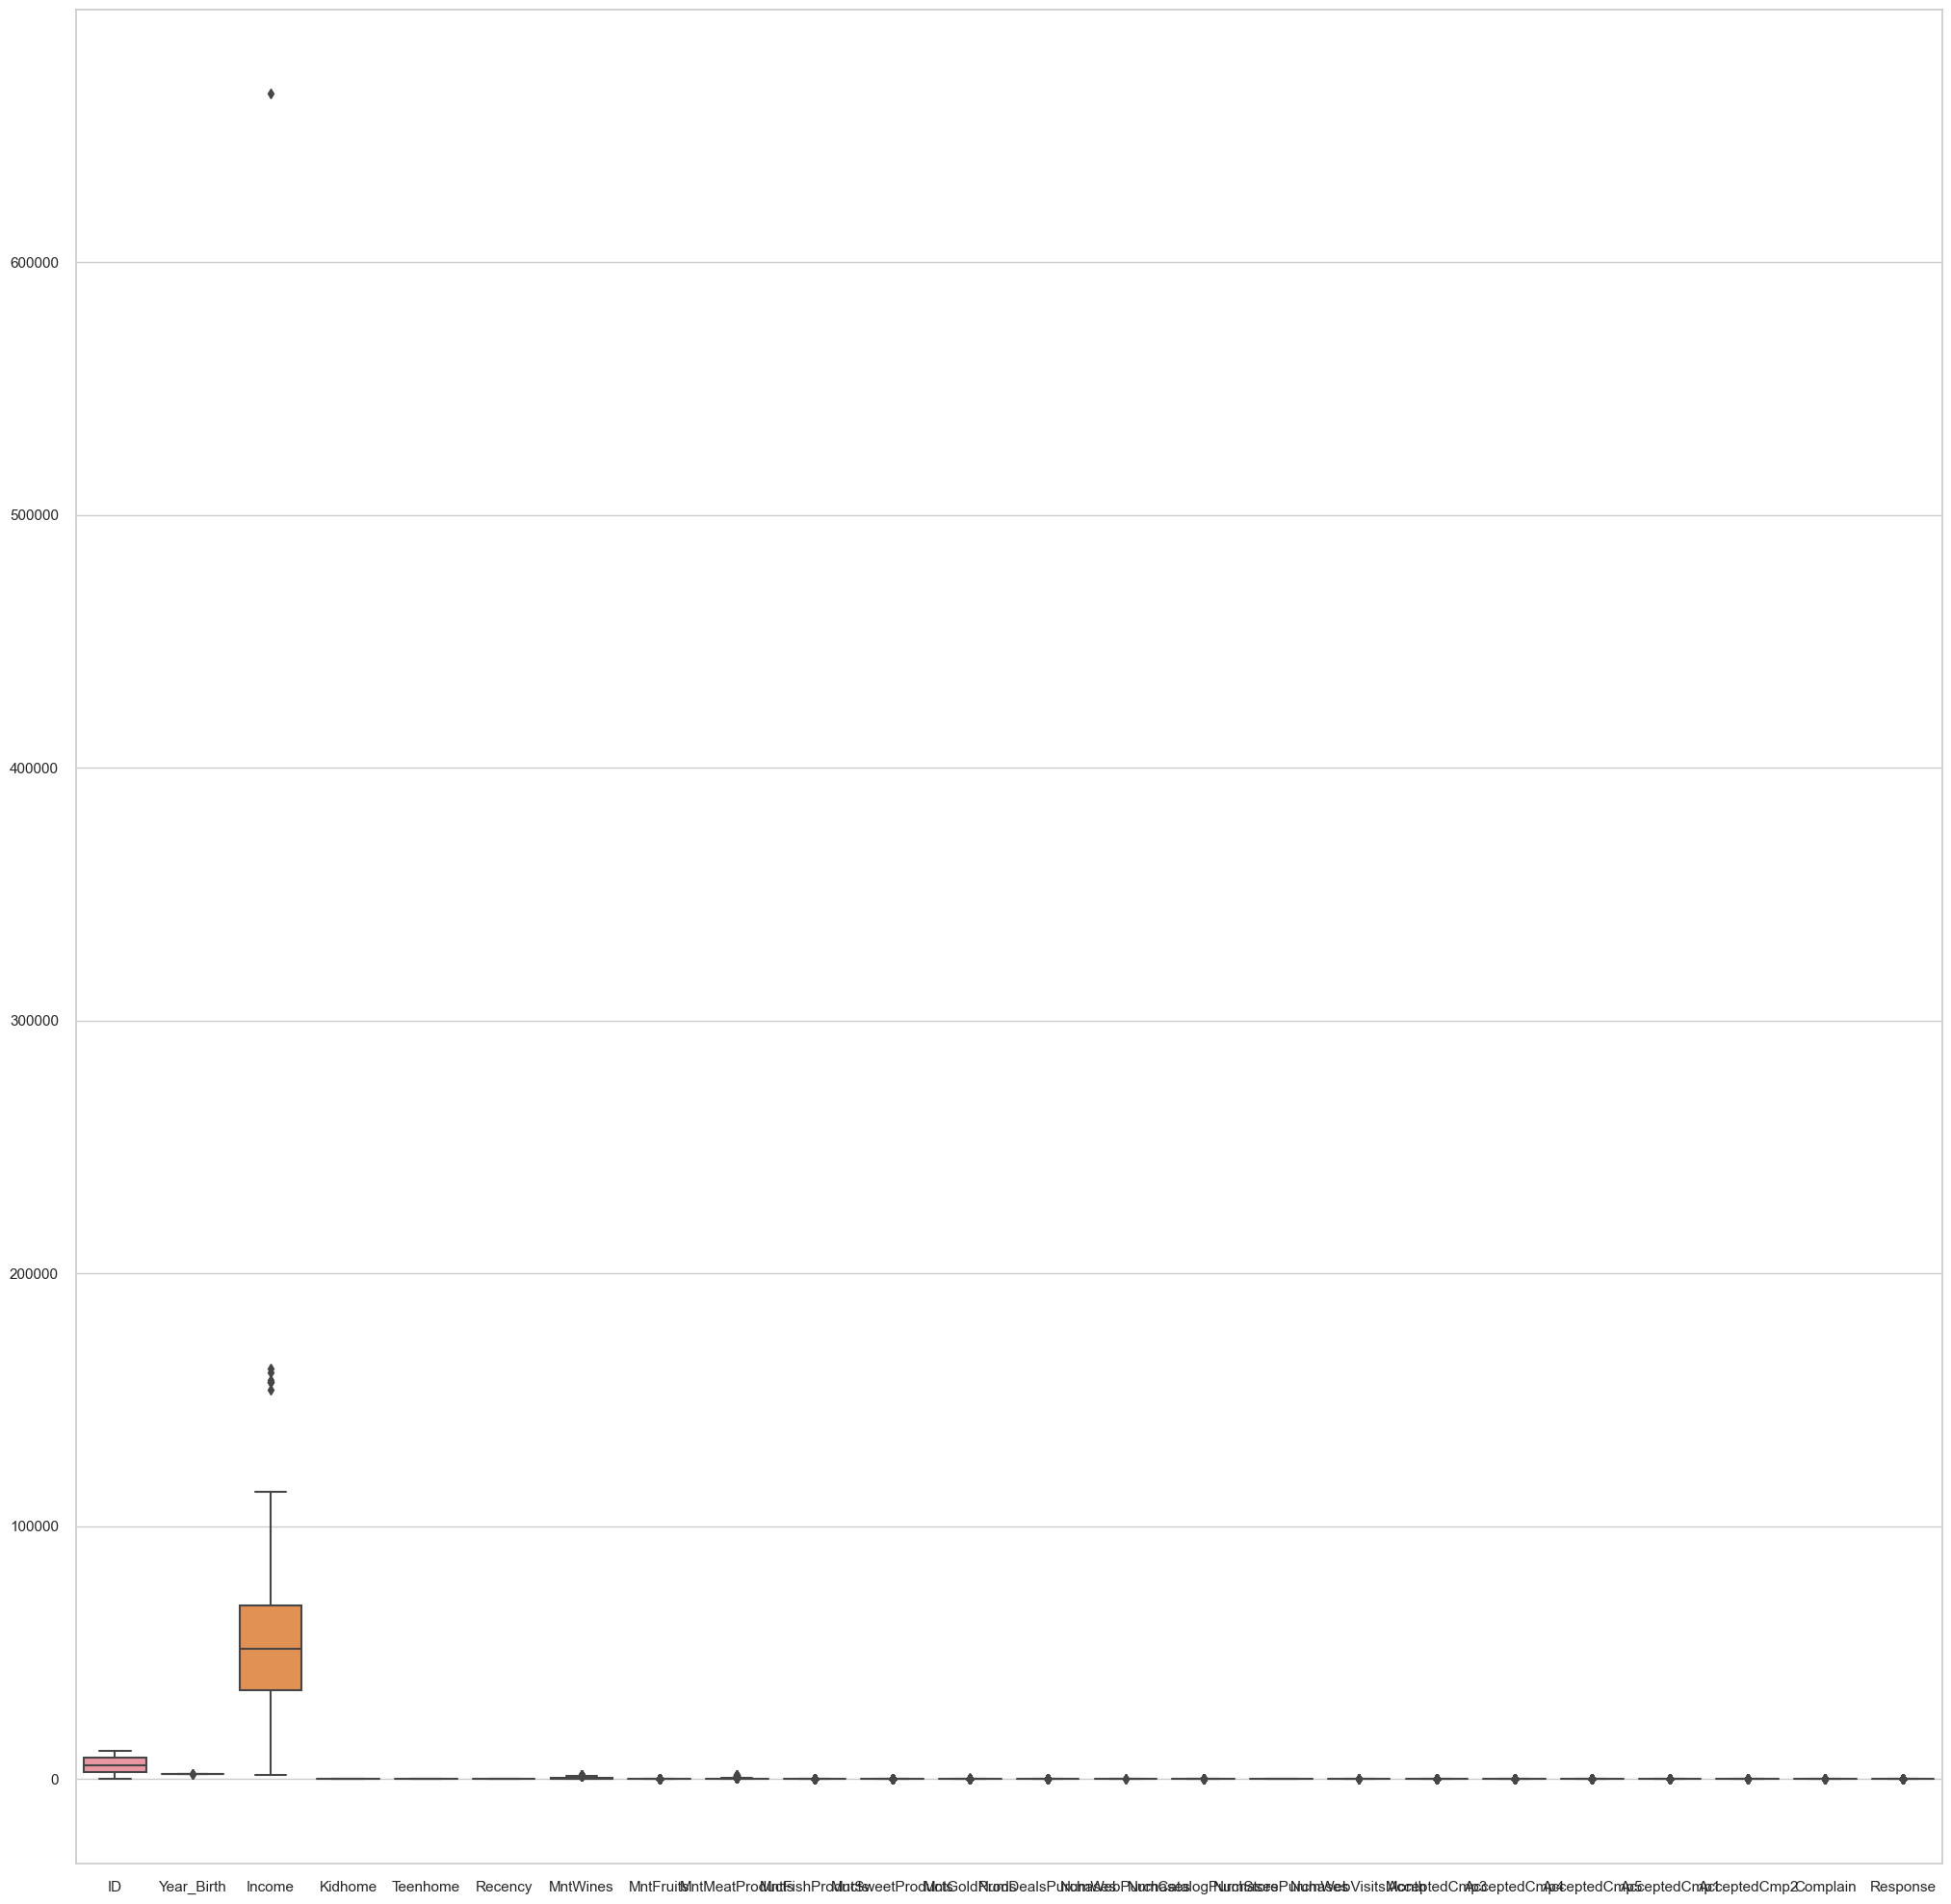

In [14]:
# check outliers
plt.figure(figsize=(25,25))
sns.boxplot(df)
plt.show()

#### We can see Only Income column has outliers. So we will analyze it further.

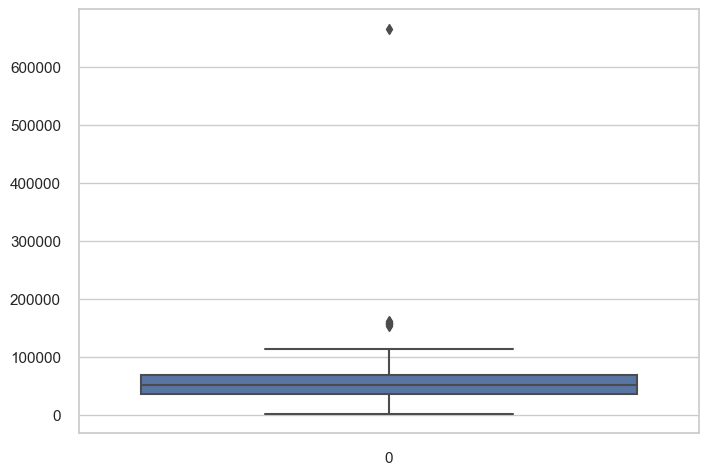

In [15]:
# Box plot to check the outliers in Income column
sns.boxplot(df['Income']);

In [16]:
# Calculating IQR (Inter Quartile Range)
Q1 = df['Income'].quantile(0.25)
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on IQR
df = df[~((df['Income'] < (Q1 - 1.5 * IQR)) | (df['Income'] > (Q3 + 1.5 * IQR)))]

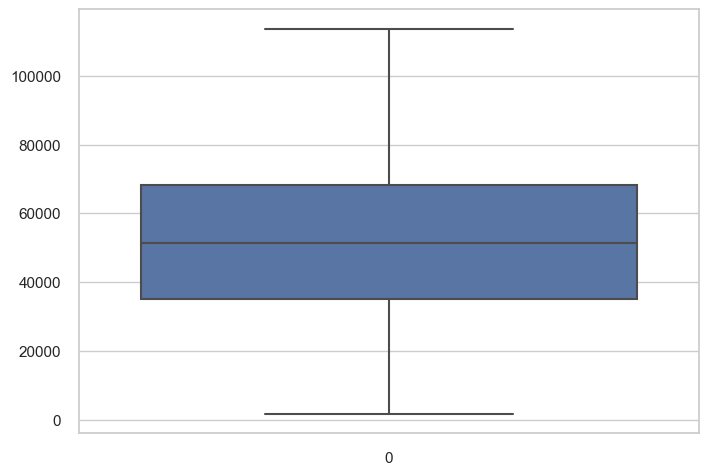

In [17]:
# Checking if the outliers are removed
sns.boxplot(df['Income']);

## Feature Engineering

In [18]:
# Feature 1: Creating "Age" column from "Year_Birth"
df['Age'] = 2024 - df['Year_Birth']

In [19]:
# printing unique values in Education and Marriage_Status Columns to create new features from them
print("Education:", df["Education"].unique())
print("Maritial_Status:", df["Marital_Status"].unique())

Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Maritial_Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [20]:
# Feature 2: Creating Education_level from Education column
def education(i):
    if i in ["Graduation","phD","Master"]:
        return "high"
    elif i in ["Basic"]:
        return "Middle"
    else:
        return "Low"

df["Education_level"] = df["Education"].apply(education)

In [21]:
# Feature 3: Creating Living_Status from Marriage_Status column
def status(i):
    if i in ['Alone', 'Absurd', 'YOLO']:
        return 'Living Alone'
    else:
        return 'Living with Others'

df['Living_Status'] = df['Marital_Status'].apply(status)

In [22]:
# Feature 4: Total_Campaings_Accepted by totalling the total no. of campaigns accepted
df['Total_Campaigns_Accepted'] = df[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

In [23]:
# Feature 5: Total spending
df['Total_Spend'] = (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1))

In [24]:
# Feature 6: Creating Parent feature to know if they are parent or not
df['Parent'] = (df['Kidhome'] + df['Teenhome'] > 0).astype(int)

In [25]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Education_level,Living_Status,Total_Campaigns_Accepted,Total_Spend,Parent
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,1,67,high,Living with Others,0,1617,0
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,70,high,Living with Others,0,27,1
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,59,high,Living with Others,0,776,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,40,high,Living with Others,0,53,1
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,43,Low,Living with Others,0,422,1


In [26]:
# drop irrelevant features
df = df.drop(['Dt_Customer', 'Year_Birth', 'ID'], axis=1)

## EDA

In [27]:
# getting summary statistics of the dataframe
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Total_Campaigns_Accepted,Total_Spend,Parent
count,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,...,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000,2208.000000
mean,51633.638134,0.442029,0.506341,49.014040,306.100996,26.435236,165.347826,37.758605,27.122283,44.110960,...,0.074275,0.073370,0.064312,0.013587,0.009511,0.150815,55.192935,0.299366,606.875906,0.715127
std,20713.376530,0.537063,0.544325,28.938638,337.516270,39.842478,217.852649,54.813323,41.116999,51.852016,...,0.262278,0.260801,0.245363,0.115795,0.097081,0.357950,11.991913,0.680201,602.090272,0.451456
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,5.000000,0.000000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.000000,0.000000,69.000000,0.000000
50%,51301.000000,0.000000,0.000000,49.000000,177.500000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,54.000000,0.000000,397.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,0.000000,1047.250000,1.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,131.000000,4.000000,2525.000000,1.000000


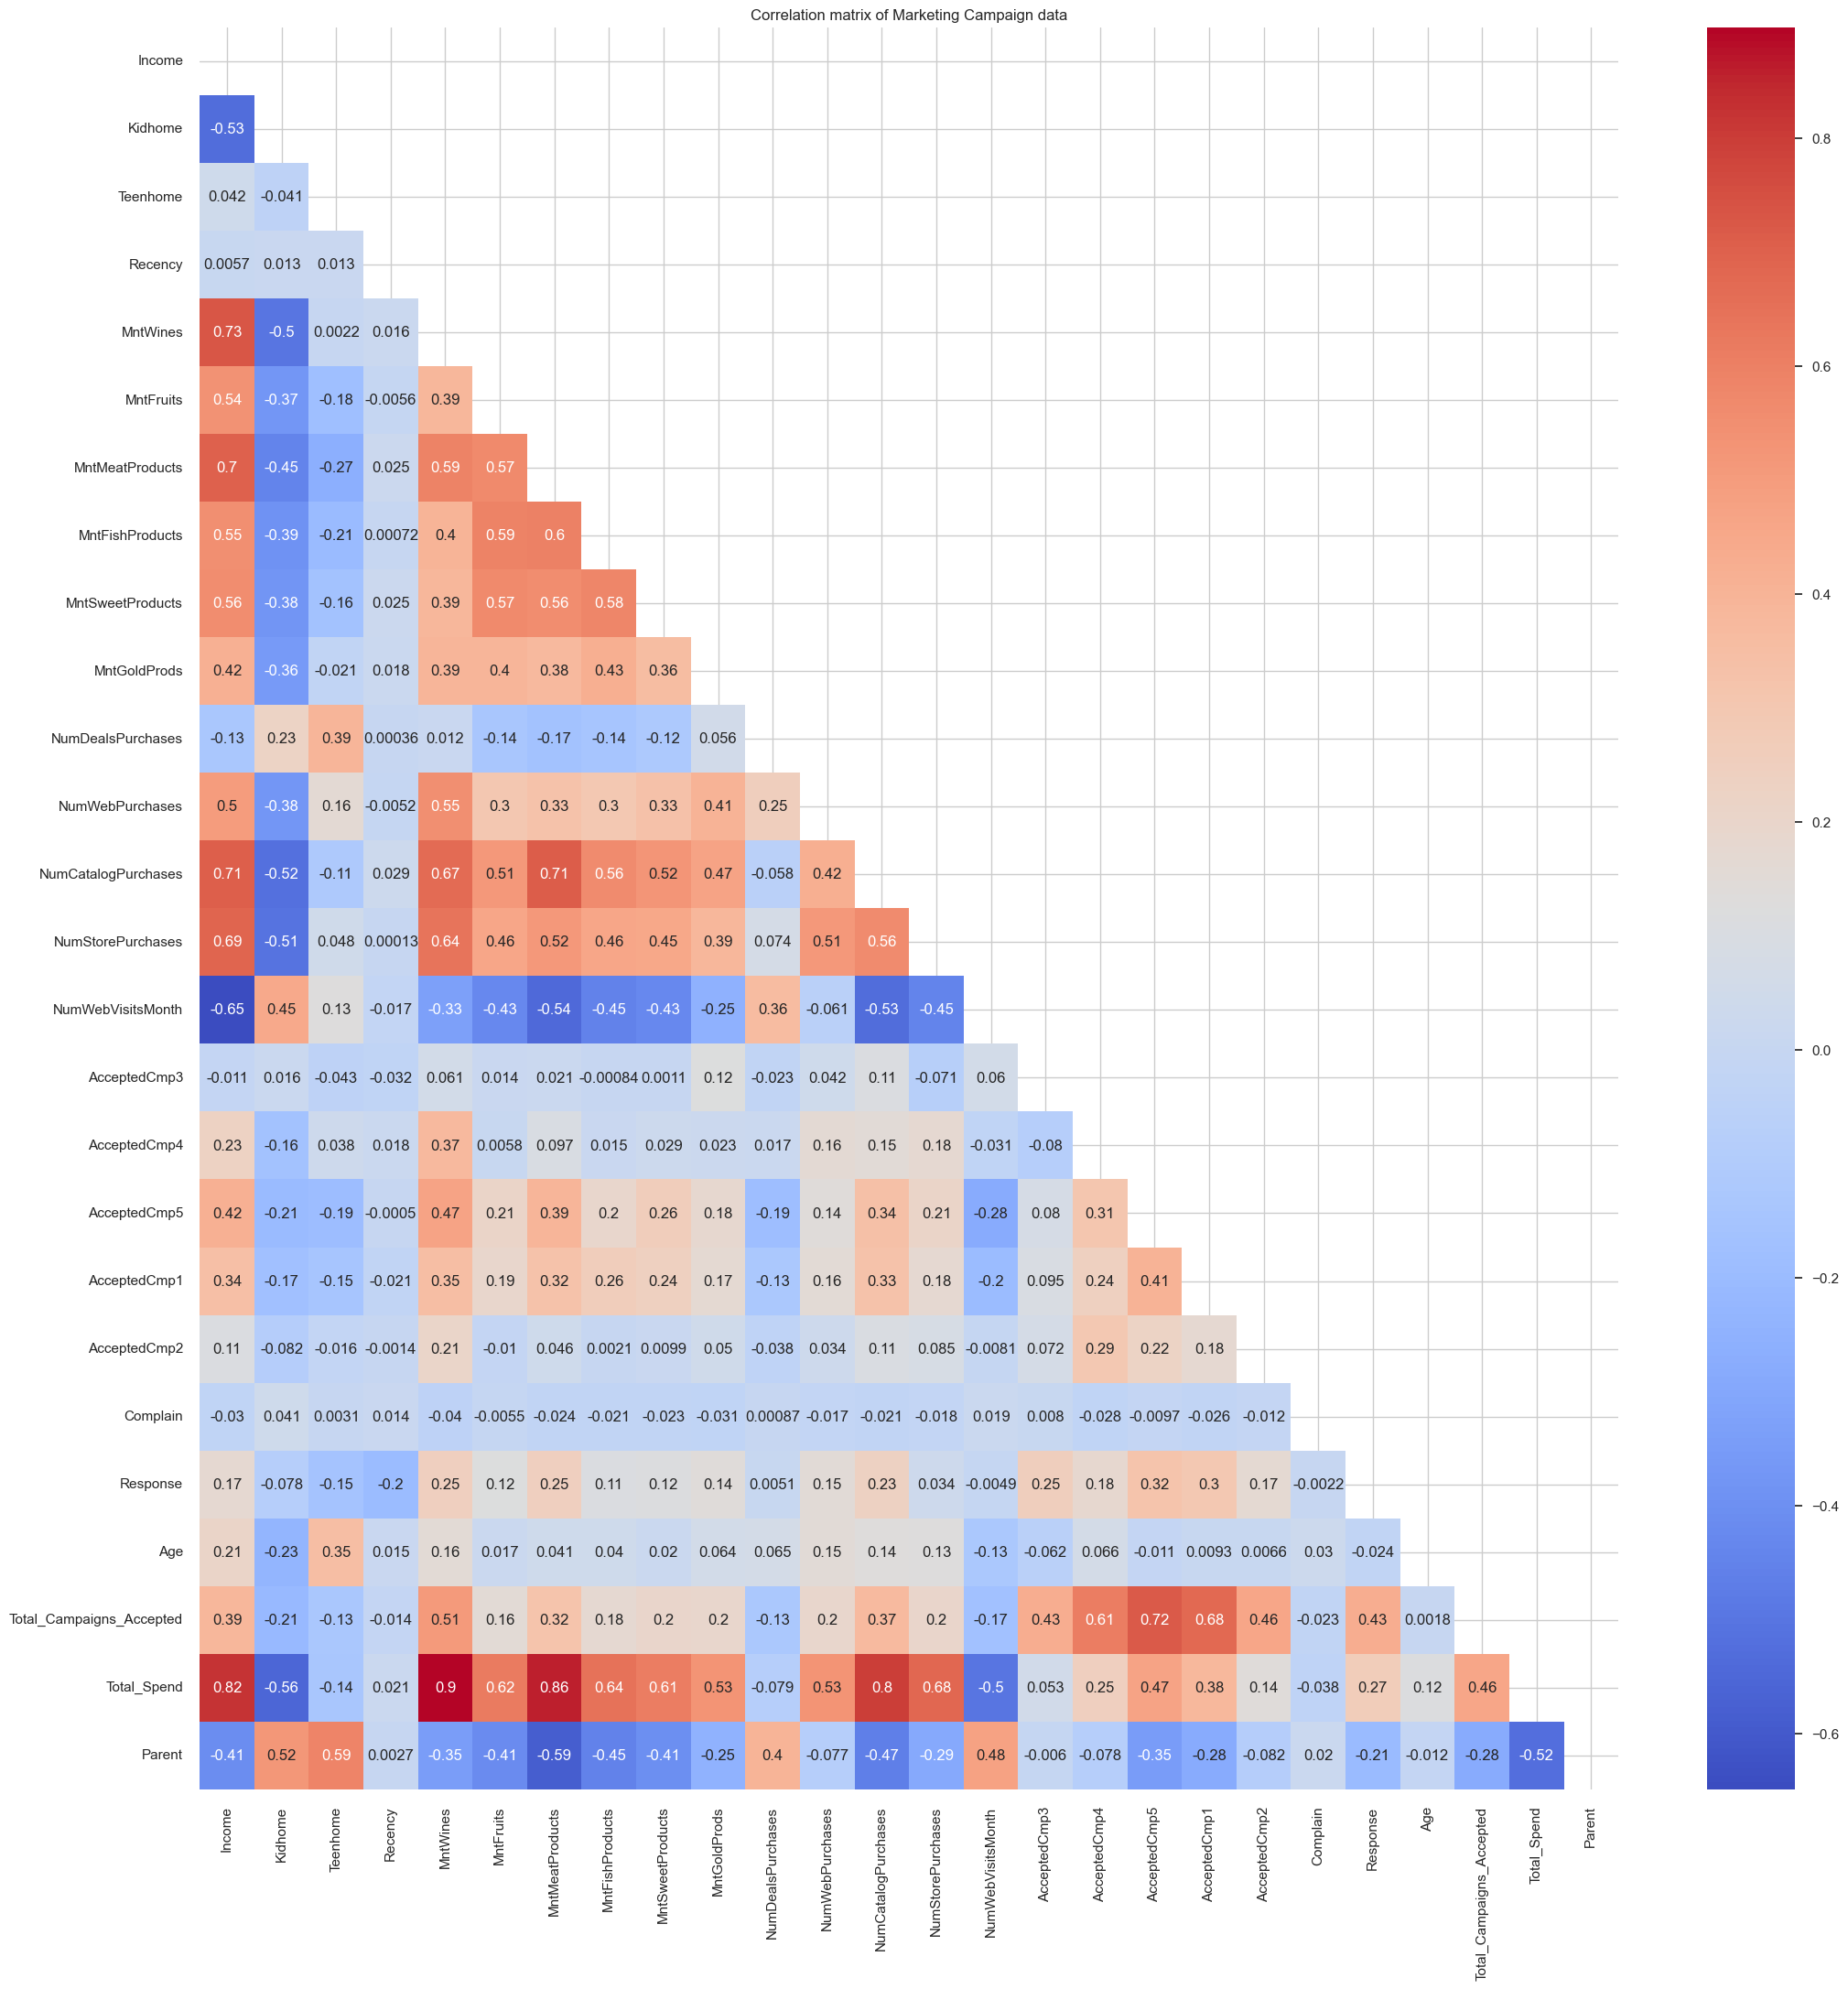

In [28]:
# Correlation matrix

# compute the correlation matrix
corr = df._get_numeric_data().corr().round(2)

# generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25, 25))
numerical_data = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(df.select_dtypes
            (include='number').corr(), annot=True, cmap='coolwarm', mask=mask)
plt.title('Correlation matrix of Marketing Campaign data')
plt.show()

#### There are many correlations, but we are mention the ones which might have an impact on target variable.
#### __Negative Correlations__
#### Strong negative correlation is seen between Income and NumWebVisitsMonth with a value of about -0.65.
#### Negative correlation is seen between Parent and MntMeatProducts with a value of about -0.59 stating that with an increase in the Parent variable there is a decrease in the value of the Mnt meat production. 
#### Total_Spend and Kidhome: These two deliver a negative correlation as total amount spent by a customer is not impacted by the presence of kids in home and has a value of about -0.56.
#### Parent Status and Total_Spend: Being a parent seems to negatively correlate with spending, implying that parents might be more conservative in their spending the amount with a correlation value of about -0.52.
#### Parent Status and Total_Campaigns_Accepted: Parents are less likely to accept campaigns, possibly due to different priorities or limited resources with a value of -0.28.

#### __Positive Correlations__
#### Strong positive correlation is seen between Total_Spend and MntWines with a value of 0.9.
#### Total_Spend and MntMeatProducts: A postive correlation of about 0.86 is seen and justifies that with an increase in total spending an increase in the Mnt meat products is also seen.
#### Total_Spend and Income: Higher income is strongly associated with higher total spending, as indicated by a positive correlation with a value of about 0.82.
#### Total_Spend and NumCatalogPurchases : Positive correlation of 0.8 is observed in this scenario that indicates that with an increase in the total spend an incraese in the NumCatlog purchases is also observed.
#### Income and MntWines: Positive correlation of about 0.73 is seen which states that with an increase in the income an increase in the MntWines is also seen.
#### Total_Campaigns_Accepted and Total_Spend: Customers who spend more tend to accept more campaigns and it has a positive correlation of about 0.46.
#### Spending and Product Categories: Total spending is positively correlated with spending across different product categories (e.g., wines, meat, fish), which suggests that overall spending is influenced by these categories.

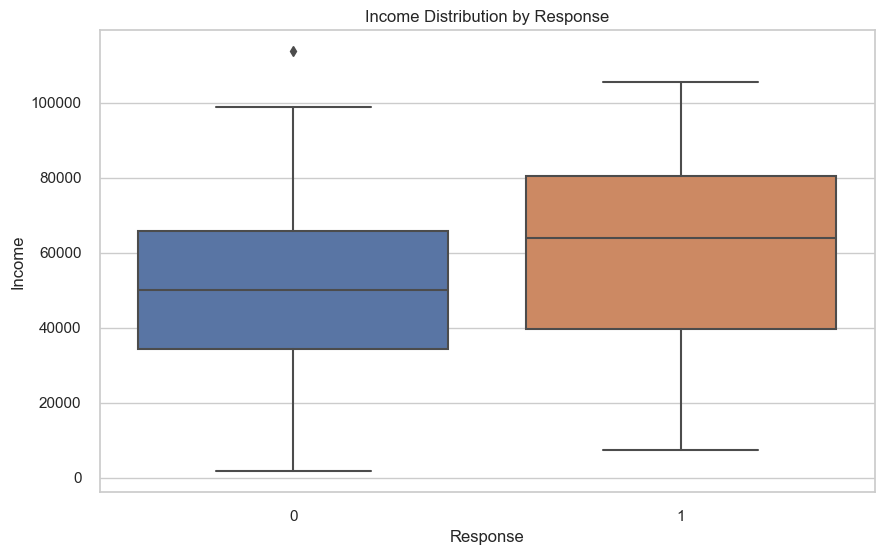

In [29]:
# Boxplot to see the distribution of responses by income)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response', y='Income', data=df)
plt.title('Income Distribution by Response')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

#### 1. Customers who responded to the marketing campaign have a higher median income compared to those who did not respond.
#### 2. Higher-income customers are more likely to respond to campaigns, suggesting that campaigns targeting this group could yield better results.
#### 3. We can also see that People who have responded to the campaigns have a minimum income less than 40000 and maximum income of more than 100000.

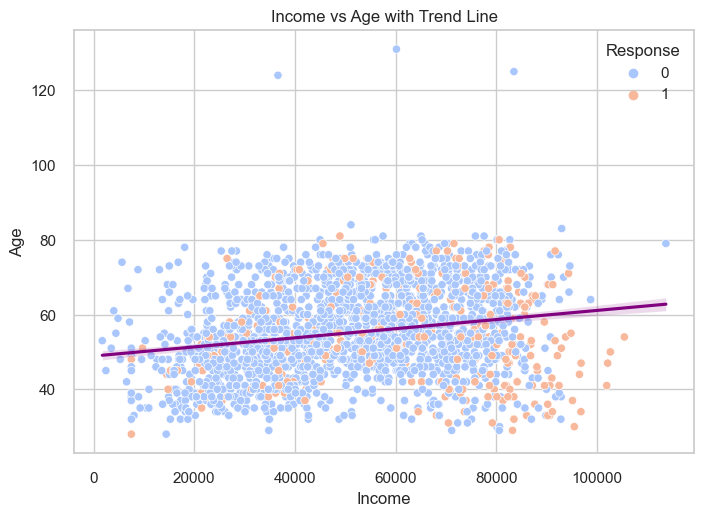

In [30]:
# scatterplot between Income vs Age
sns.scatterplot(x='Income', y='Age', data=df, hue='Response', palette='coolwarm')
sns.regplot(x='Income', y='Age', data=df, scatter = False, color = 'purple', line_kws = {'label' :'Trend line'}) 
plt.title('Income vs Age with Trend Line')
plt.xlabel('Income')
plt.ylabel('Age')
plt.show()

#### 1. The trend line shows a slight upward slope, indicating that as Age increases, Income tends to increase as well. However, the slope is very gentle, suggesting that the relationship is weak.
#### 2. The wide spread of data points indicates that income and age are influenced by a variety of factors, and there is a lot of individual variation within each age group.
#### 3. We have 3 outliers above age 120, suggesting that it might be a very old data.
#### 4. we can also observe that most of the people earning above 80000 are responding to the campaigns.

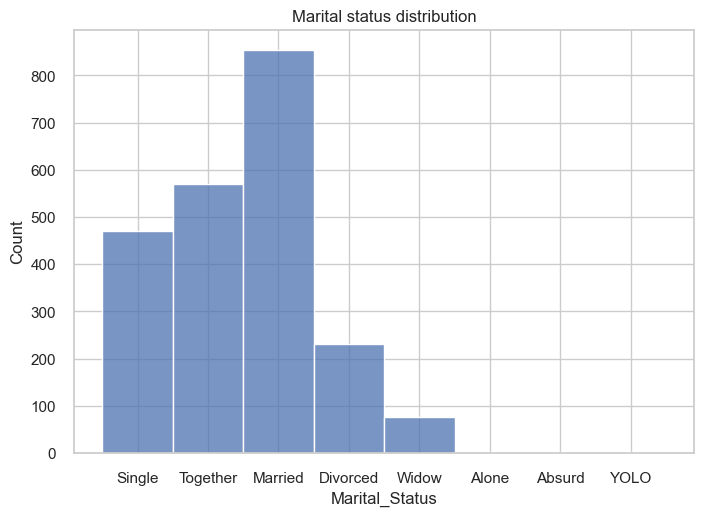

In [31]:
# Marital_status Distribution
sns.histplot(df, x='Marital_Status')
plt.title("Marital status distribution");

#### 1. Significant proportion of individuals in the dataset are married.
#### 2. "Single" and "Together" have the second and third highest counts.
#### 3. "Divorced," "Widow," "Alone," "Absurd," and "YOLO" have relatively low counts, suggesting that they are less common.

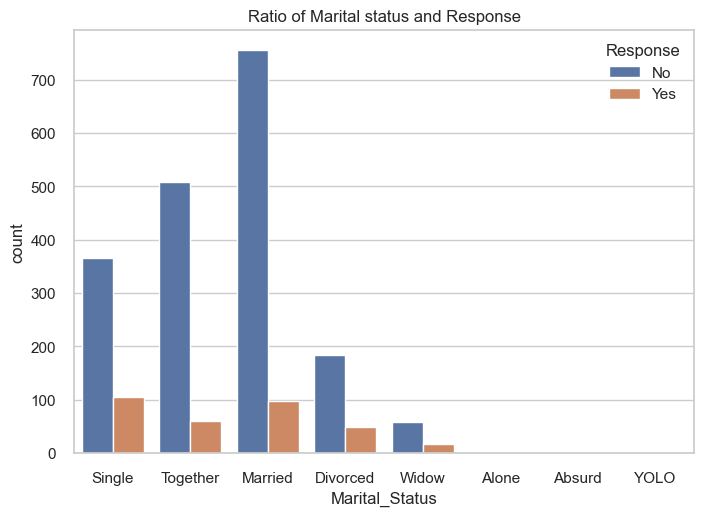

In [32]:
# To analyze the Marital_status and Response
sns.countplot(x = 'Marital_Status',hue='Response', data = df)
plt.title('Ratio of Marital status and Response')
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])
plt.show()

#### 1. Married individuals: This group has the highest number of both "No" and "Yes" responses, with the "Yes" count being second highest among other groups. But since most of the married responses are "No", It would not be as effective to target this group.
#### 2. Single individuals: This group has the highest number of "Yes" responses. By looking at the ratio of "Yes" to "No". we can say that this is the best group to target for increase in campaign responses.
#### 3. The remaining groups have relatively low counts for "Yes" responses.

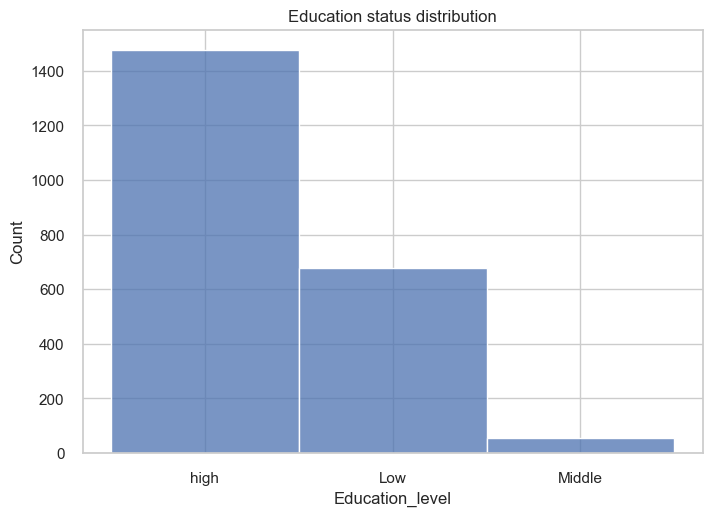

In [33]:
# Education level distribution
sns.histplot(df, x='Education_level');
plt.title("Education status distribution");

#### Most of them are either Highly educated or have a low level of education

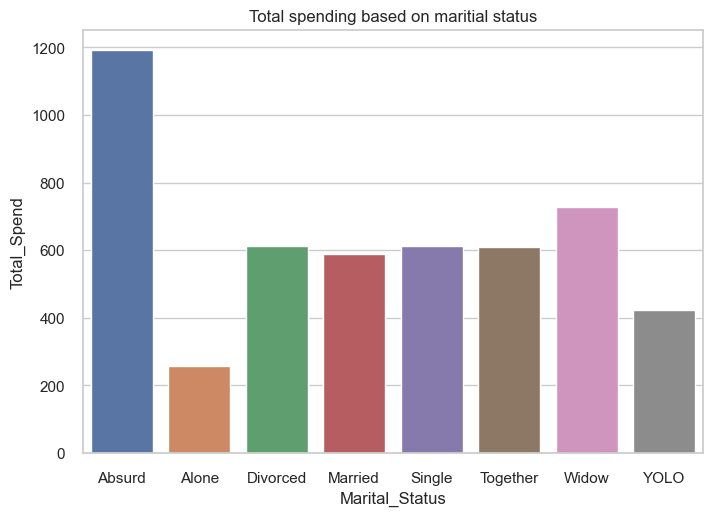

In [34]:
df_plot = df.groupby(['Marital_Status'])['Total_Spend'].mean().reset_index()
sns.barplot(data=df_plot, x='Marital_Status', y='Total_Spend');
plt.title("Total spending based on maritial status");

#### 1. Absurd group of people have the most spending. But we saw that they did not respond to any marketing campaign. So this could be a potential group where we can put some extra efforts into, so that we would have a good response.
#### 2. We can observe that People who are single are spending the most compared to people who are together.

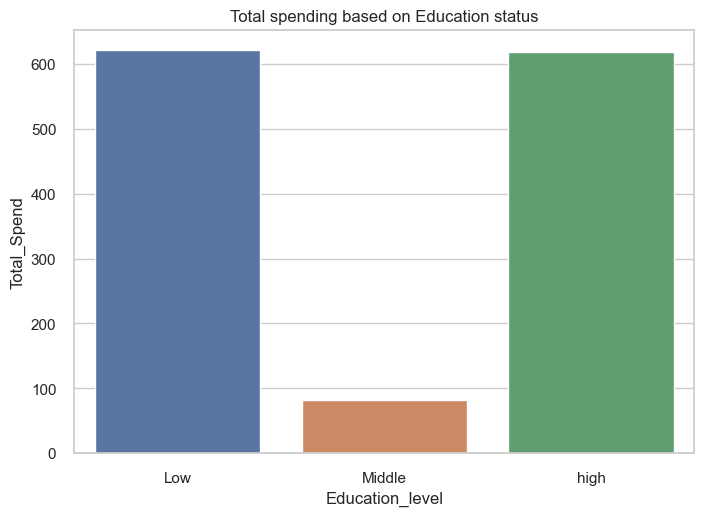

In [35]:
# Total spending vs education status
df_plot = df.groupby(['Education_level'])['Total_Spend'].mean().reset_index()
sns.barplot(data=df_plot, x='Education_level', y='Total_Spend')
plt.title("Total spending based on Education status");

#### Most of the spending is from people who have low and High education

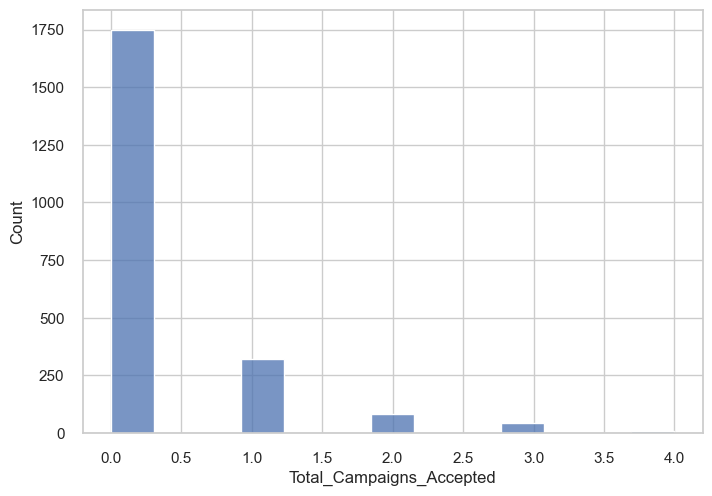

In [36]:
# Total Campaigns Accepted Distribution
sns.histplot(df, x='Total_Campaigns_Accepted');

#### We can observe that the dataset have very few data on people who have accepted the campaigns.

## MODEL BUILDING

In [37]:
# Taking a backup of original dataset before it undergoes further changes
df_bkp = df.copy()

In [38]:
# drop the columns from which we have created new features
df.drop(['Education', 'Marital_Status'],axis=1,inplace=True)

In [39]:
# One-hot encode categorical variables
# Creating dummy variables
Education_level = pd.get_dummies(df['Education_level'], drop_first=True, dtype=int)
Marital_Status = pd.get_dummies(df['Living_Status'], drop_first=True, dtype=int)

In [40]:
# dropping the column because we have created dummy variables
df.drop(['Education_level', 'Living_Status'],axis=1,inplace=True)

In [41]:
# attach the created dummy variables to the main data frame
df = pd.concat([df, Education_level, Marital_Status], axis=1)

In [42]:
# checking the info of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2208 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Income                    2208 non-null   float64
 1   Kidhome                   2208 non-null   int64  
 2   Teenhome                  2208 non-null   int64  
 3   Recency                   2208 non-null   int64  
 4   MntWines                  2208 non-null   int64  
 5   MntFruits                 2208 non-null   int64  
 6   MntMeatProducts           2208 non-null   int64  
 7   MntFishProducts           2208 non-null   int64  
 8   MntSweetProducts          2208 non-null   int64  
 9   MntGoldProds              2208 non-null   int64  
 10  NumDealsPurchases         2208 non-null   int64  
 11  NumWebPurchases           2208 non-null   int64  
 12  NumCatalogPurchases       2208 non-null   int64  
 13  NumStorePurchases         2208 non-null   int64  
 14  NumWebVisitsM

In [43]:
# Scaling the data using Standard scaler
scaler = StandardScaler()

In [44]:
# fitting the data
# dropping the TARGET CLASS as we need not scale the Target variable.
scaler.fit(df.drop('Response', axis=1))

StandardScaler()

In [45]:
# transforming the data into a form that is more suitable for the model
scaled_features = scaler.transform(df.drop('Response', axis=1))

In [46]:
# creating new data frame which scaled features.
df_feat = pd.DataFrame(scaled_features)
df1 = df.drop('Response', axis=1)
df_feat.columns = df1.columns

In [47]:
# checking the scaled features
df_feat.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,AcceptedCmp1,AcceptedCmp2,Complain,Age,Total_Campaigns_Accepted,Total_Spend,Parent,Middle,high,Living with Others
0,0.314089,-0.823235,-0.930428,0.310588,0.974689,1.545554,1.747688,2.449620,1.480933,0.846621,...,-0.262168,-0.117363,-0.097991,0.984809,-0.440214,1.678075,-1.584403,-0.158334,0.703507,0.056395
1,-0.255431,1.039166,0.907126,-0.380686,-0.874529,-0.638540,-0.731613,-0.652518,-0.635460,-0.735161,...,-0.262168,-0.117363,-0.097991,1.235034,-0.440214,-0.963323,0.631152,-0.158334,0.703507,0.056395
2,0.964782,-0.823235,-0.930428,-0.795450,0.355320,0.566478,-0.176066,1.336500,-0.148933,-0.040720,...,-0.262168,-0.117363,-0.097991,0.317541,-0.440214,0.280959,-1.584403,-0.158334,0.703507,0.056395
3,-1.206626,1.039166,-0.930428,-0.795450,-0.874529,-0.563226,-0.667335,-0.506535,-0.586807,-0.754451,...,-0.262168,-0.117363,-0.097991,-1.267219,-0.440214,-0.920130,0.631152,-0.158334,0.703507,0.056395
4,0.321573,1.039166,-0.930428,1.554881,-0.394444,0.415851,-0.217388,0.150388,-0.002975,-0.561551,...,-0.262168,-0.117363,-0.097991,-1.016993,-0.440214,-0.307126,0.631152,-0.158334,-1.421450,0.056395


In [48]:
# Establishing X and y
X = df_feat
y = df['Response']

In [49]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1545, 28)
X_test shape: (663, 28)
y_train shape: (1545,)
y_test shape: (663,)


## FEATURE SELECTION

In [51]:
# Method 1: Random Forest Importance
selects = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=10)
selects.fit(X_train, y_train)
rfi = X_train.columns[(selects.get_support())]
rfi.tolist()

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntGoldProds',
 'NumWebVisitsMonth',
 'Age',
 'Total_Campaigns_Accepted',
 'Total_Spend']

In [52]:
# Method 2: SelectKBest
selector = SelectKBest(f_classif, k=10) # Select the top 5 features
X_new = selector.fit(X_train, y_train)

kb_keepers = X_train.columns.values[selector.get_support()]
print(kb_keepers)

['Recency' 'MntWines' 'MntMeatProducts' 'NumCatalogPurchases'
 'AcceptedCmp3' 'AcceptedCmp5' 'AcceptedCmp1' 'Total_Campaigns_Accepted'
 'Total_Spend' 'Parent']


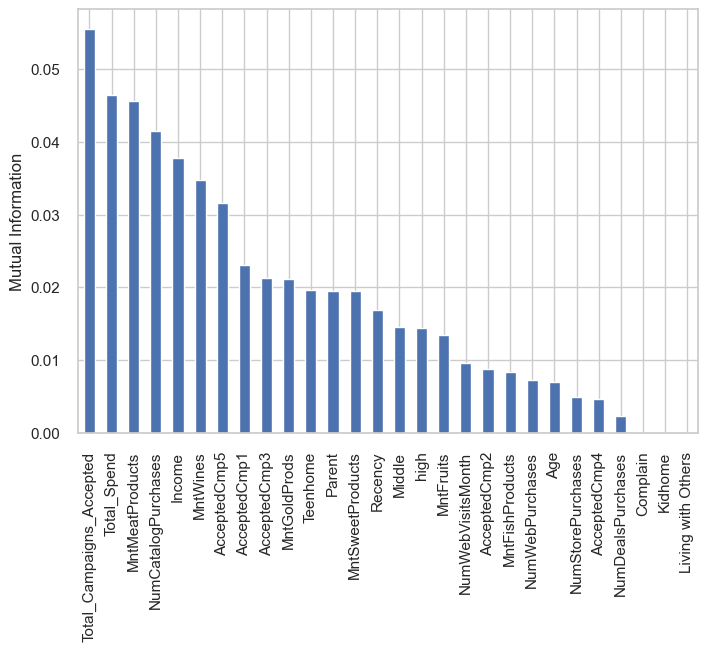

In [53]:
# Method 3: Mutual Information

x = df.drop('Response', axis=1)
y = df['Response']

mi = mutual_info_classif(x, y)
mi = pd.Series(mi)
mi.index = x.columns
mi.sort_values(ascending=False).plot.bar()
plt.ylabel('Mutual Information');

#### Based on the feature selection techniques that we used, namely 'mutual information', 'SelectKBest' and 'random forest importance', The top 10 features that give us a lot of information on target variable are:
##### 'Income','Recency','MntWines','MntFruits','MntMeatProducts','MntGoldProds','NumWebVisitsMonth','Age','Total_Campaigns_Accepted','Total_Spend'

## TRAINING THE MODEL

In [54]:
# selecting only top 10 relevant features for X train and X test 
list = ['Income','Recency','MntWines', 'MntFruits','MntMeatProducts','MntGoldProds','NumWebVisitsMonth','Age','Total_Campaigns_Accepted','Total_Spend']
X_train=X_train[list]
X_test=X_test[list]

#### Model 1: KNN Classifier

In [55]:
# getting the error rate in each case where k value ranges from 1 to 50
error_rate =[]
for i in range(1,51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions = knn.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

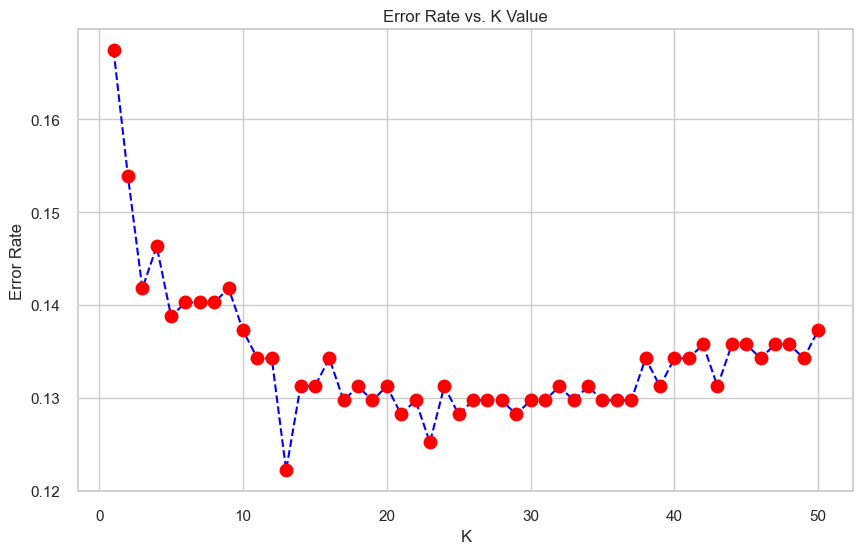

In [56]:
# plotting the error rate vs K value graph to choose the best K value
plt.figure(figsize=(10,6))
plt.plot(range(1,51),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate');

#### The above plot displays the least error rate when k=13, but for better model analysis considering k=23 is optimal as it delivers better evaluation of the model

In [57]:
# Using the best K value to train the model (i.e K=23)
knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
pred_val = knn.predict(X_test)

In [58]:
# Accuracy of predictions after using best K value
accuracy_score(y_test, pred_val) * 100

87.48114630467572

#### Accuracy= 87.48%

In [59]:
# confusion matrix after using the best K value
print(confusion_matrix(y_test,pred_val))

[[556   3]
 [ 80  24]]


In [60]:
# Classfication report after using the best K value
print(classification_report(y_test,pred_val))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93       559
           1       0.89      0.23      0.37       104

    accuracy                           0.87       663
   macro avg       0.88      0.61      0.65       663
weighted avg       0.88      0.87      0.84       663



#### Model 2: Random Forest Model

In [61]:
# using random forest classifier
rf = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf.fit(X_train, y_train)
predictions_rf = rf.predict(X_test)

print(confusion_matrix(y_test, predictions_rf))
print(accuracy_score(y_test, predictions_rf) * 100)
print(classification_report(y_test,predictions_rf))

[[541  18]
 [ 70  34]]
86.72699849170438
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       559
           1       0.65      0.33      0.44       104

    accuracy                           0.87       663
   macro avg       0.77      0.65      0.68       663
weighted avg       0.85      0.87      0.85       663



#### Accuracy= 86.72%

#### __Model Comparision:__
#### 1.Random forest model has an accuracy score of 86.72%, whereas, KNN has an accuracy score of 87.48%
#### 2. Random forest model has an higher F1 score of 44% in predicting if the Customer will responed to a marketing campaign, but KNN model has only 37%.
#### 3. Random forest model and KNN have similar f1 score for predicting customers who dont respond to the campaign.

#### __Conclusion:__
#### Since the objective of prediction model is to predict if the customer will respond to a campaign. The best model to select is Random forest model.

## Clustering - Agglomerative CLUSTRING ALGORITHM

In [62]:
# Perform PCA to reduce data to 3 dimensions
pca = PCA(n_components=3)
# df_feat.dropna(inplace=True)
pca.fit(df_feat)
PCA_ds = pd.DataFrame(pca.transform(df_feat), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2208.0,1.930823e-16,2.890108,-5.381198,-2.566313,-0.842917,2.239373,9.066454
col2,2208.0,-1.126313e-17,1.547626,-3.563357,-1.048476,-0.062379,0.736493,9.086489
col3,2208.0,2.574430e-17,1.526154,-3.489283,-1.109410,-0.097060,0.979197,5.856732


Elbow Method to determine the number of clusters to be formed:


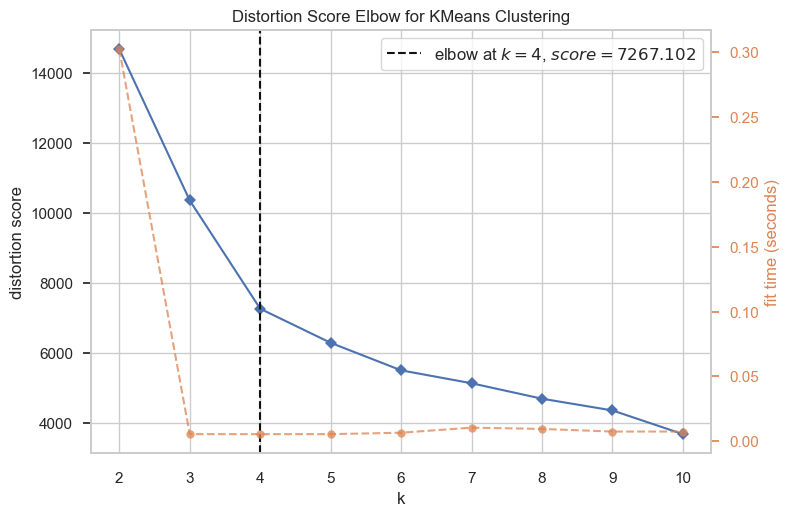

In [63]:
# Plotting Score for different clusters and finding the best number of clusters
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show();

#### The above plot between k and distortion score analyzes the optimal k value by determining the elbow point from the graph. The optimal k value is identified as 4.  According to the graph the best number of clusters the data can be divided into is 4.

In [64]:
# Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
yhat_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = yhat_AC
# Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= yhat_AC

In [65]:
# checking if Clusters are added corresponding to the data
print(PCA_ds.head())
print(PCA_ds.shape)

       col1      col2      col3  Clusters
0  4.009728 -1.775996 -0.973371         2
1 -2.623545 -0.107304  0.173295         1
2  1.916436 -1.047871 -1.006453         2
3 -2.799028  0.659755 -1.077621         1
4 -0.684801 -0.514282 -0.159528         1
(2208, 4)


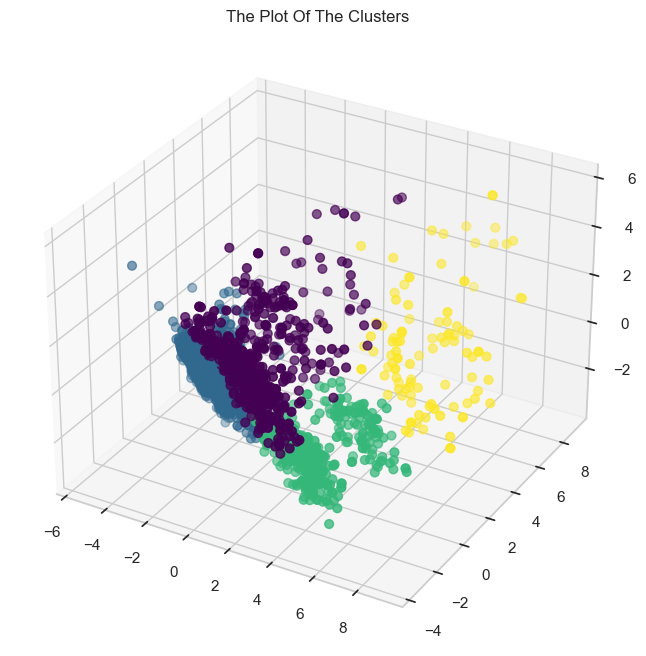

In [66]:
# Plotting the clusters in 3D space
fig = plt.figure(figsize=(10,8))
x = PCA_ds['col1']
y=PCA_ds['col2']
z=PCA_ds['col3']
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

#### The clusters seem to be relatively well-separated, suggesting that the clustering algorithm has effectively grouped datapoints.

In [67]:
# Creating a custom color palette for recognizing the cluster
pal = ["#FF0000", "#0000FF", "#FFFF00", "#008000"] # [red, blue, yellow, green]

## Cluster Analysis

In [68]:
# Adding Education_level and Living_Status for analysis from backedup dataset
df['Education_level'] = df_bkp['Education_level']
df['Living_Status'] = df_bkp['Living_Status']

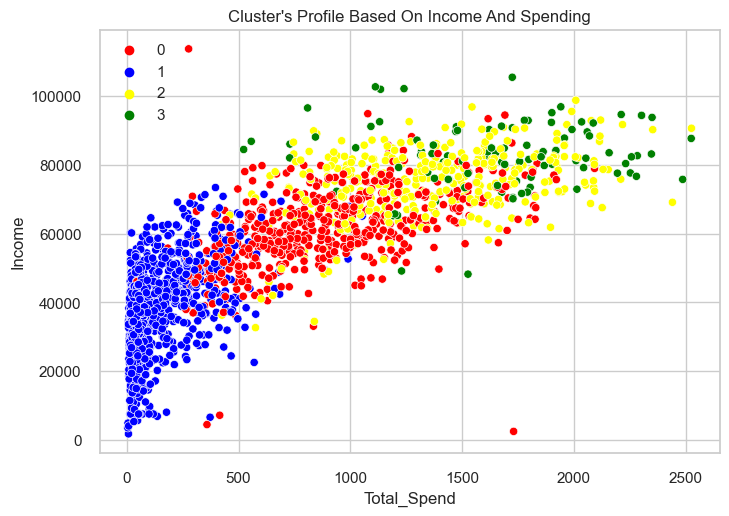

In [69]:
# Income vs Spending based on clusters
pl = sns.scatterplot(data = df,x=df["Total_Spend"], y=df["Income"],hue=df["Clusters"], palette=pal)
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

#### Group 0 (Red): This cluster has a wide range of income levels, but the majority of individuals in this cluster seem to have lower spending compared to their income level.
#### Group 1 (Blue): This cluster appears to have individuals with low to moderate income and low spending compared to the other clusters.
#### Group 2 (Yellow): This cluster contains individuals with a moderate range of income levels and moderate spending levels.
#### Group 3 (Green): This cluster appears to have individuals with higher income levels and higher spending levels compared to the other clusters.

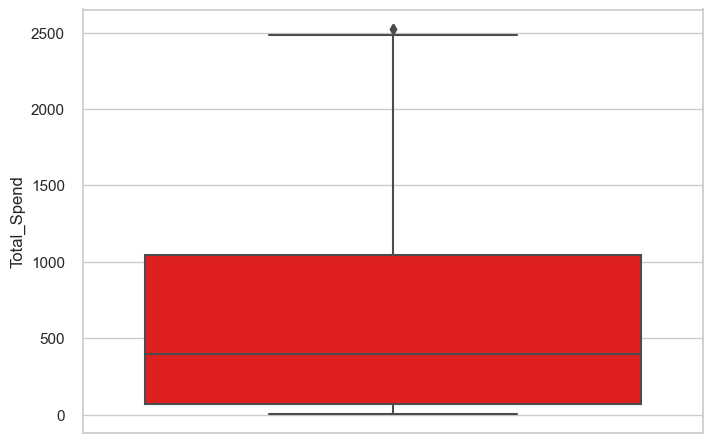

In [70]:
# Box plot of Total spending to check the median and get better idea of distribution
plt.figure()
pl=sns.boxplot(hue=df["Clusters"], y=df["Total_Spend"], palette= pal)
plt.show()

#### The median of Total spending is highest for Group 3, followed by Group 2, followed by Group 0 and the least spending is of Group 1.

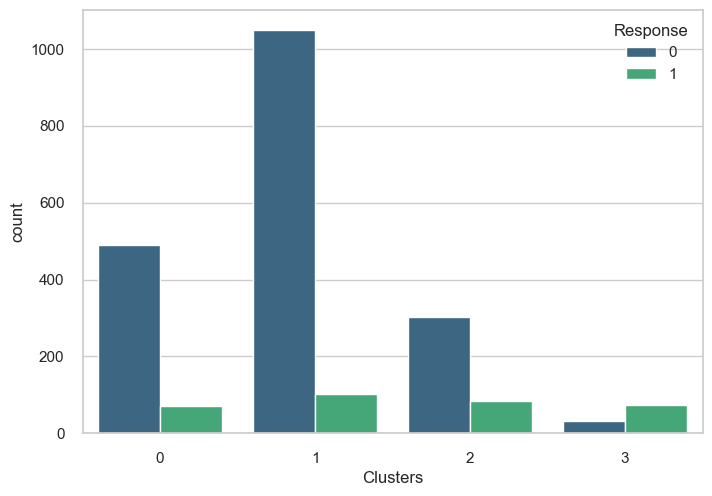

In [71]:
# checking the count of individuals in each group and their respone rate
plt.figure()
pl=sns.countplot(x=df["Clusters"], palette='viridis', hue=df['Response'])
plt.show()

#### The above graph determines the count of responses across each cluster.
#### 1. Response No - Group 1 has the highest number of individuals followed by Group 0, Group 2 and Group 3.
#### 2. Response Yes - Group 1 has the maximum number of people and if we can design campaigns targeting this group, we could get a good Return On Investment.
#### Group 3 with higher income people have more response rate. So, by a few adjustments to the campaign can help others respond better.

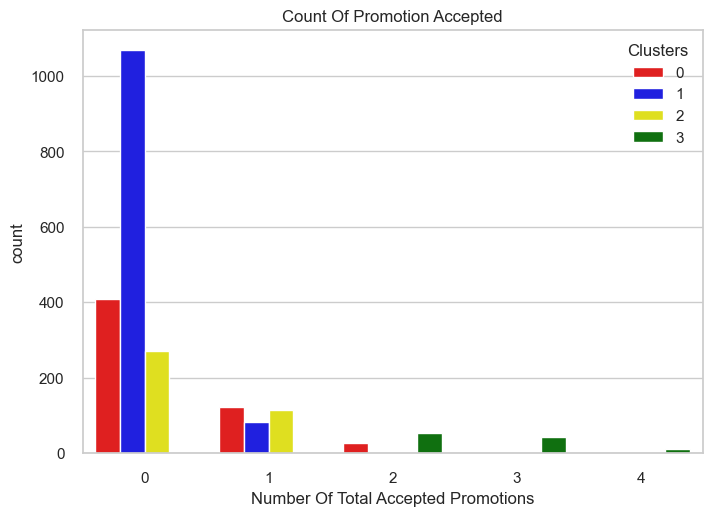

In [72]:
# Promotions accepted by each cluster
plt.figure()
pl = sns.countplot(x=df["Total_Campaigns_Accepted"],hue=df["Clusters"], palette=pal)
pl.set_title("Count Of Promotion Accepted")
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.show()

#### Group 3 are Accepting a good amount of promotions. So, increasing promotions in this category could attract more responses to the campaigns.
#### Group 0 are responding to promotions, though not in high quantity but improving the promotions could increase their response rate too.
#### Group 1 and 2 have accepted some promotions but not as significant as other Groups.

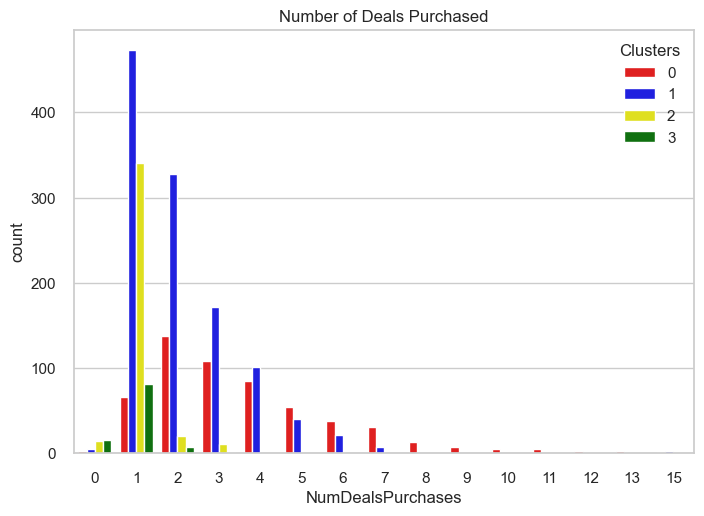

In [73]:
# Plotting the number of deals purchased
plt.figure()
pl=sns.countplot(x=df["NumDealsPurchases"],hue=df["Clusters"], palette=pal)
pl.set_title("Number of Deals Purchased")
plt.show()

#### 1. Here we find a way to attract the Group 0 and Group 1, though they are not responding to promotions, they are highly interested in deals and offers. Therefore, offering a better deal/offer could attract them more.
#### 2. Group 2 and 3 are spending and responding irrespective of deals present. So, this might not be the best approach for them.

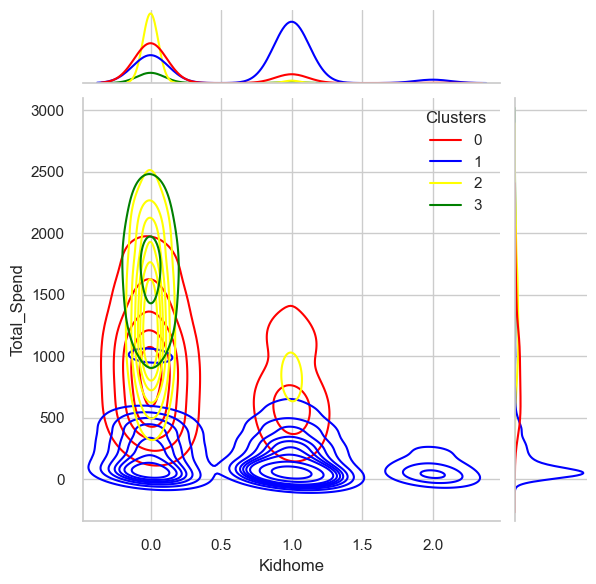

In [74]:
sns.jointplot(data = df, x='Kidhome', y="Total_Spend", hue="Clusters", kind="kde", palette=pal);

#### Here we can obsere that the speding is highest when there are no kids in the home. This could mean they don't have as much financial burden compared to indivduals who have kids.

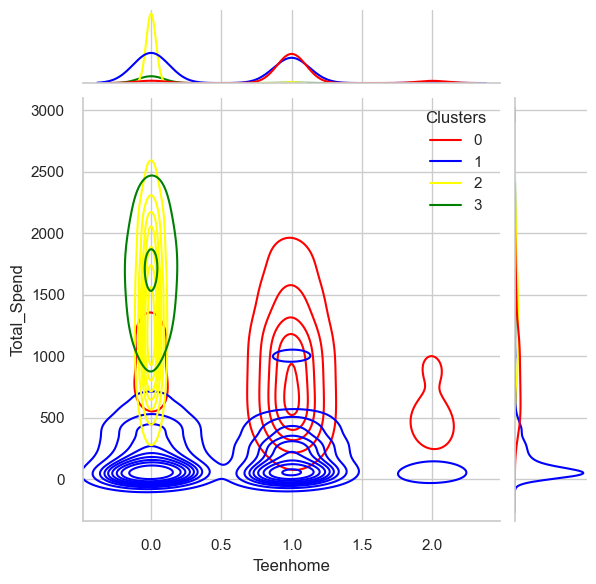

In [75]:
sns.jointplot(data = df, x='Teenhome', y="Total_Spend", hue="Clusters", kind="kde", palette=pal);

#### Here we can observe that Group 0 have more spending even though they have a teens in their homes.

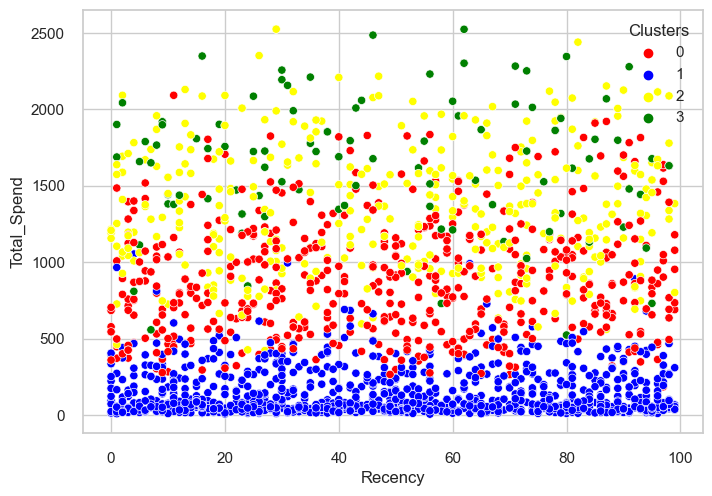

In [76]:
sns.scatterplot(data = df, x='Recency', y="Total_Spend", hue="Clusters", palette=pal);

#### Recency doesn't give a clear picture. This shows that whether they are a new customer or an old customer doesn't matter that much.

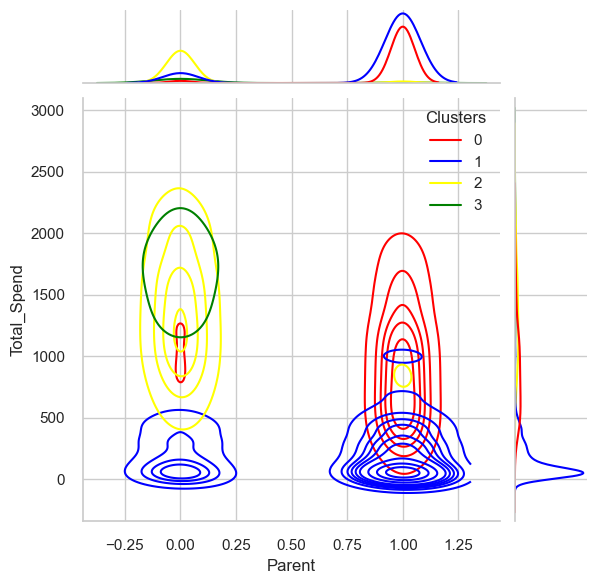

In [77]:
sns.jointplot(data = df, x='Parent', y="Total_Spend", hue="Clusters", kind="kde", palette=pal);

#### 1. Most of the Group 0 and Group 1 are parents.
#### 2. Group 2 and 3 are not parents.

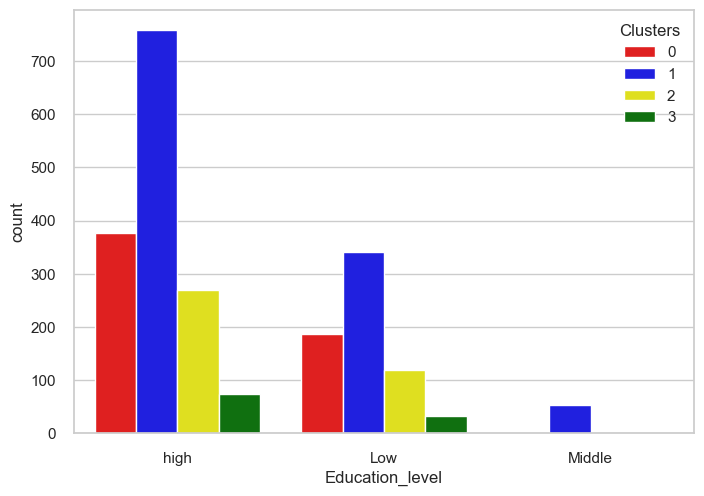

In [78]:
sns.countplot(data = df, x='Education_level', hue="Clusters", palette=pal);

#### Most of them have low or High education.

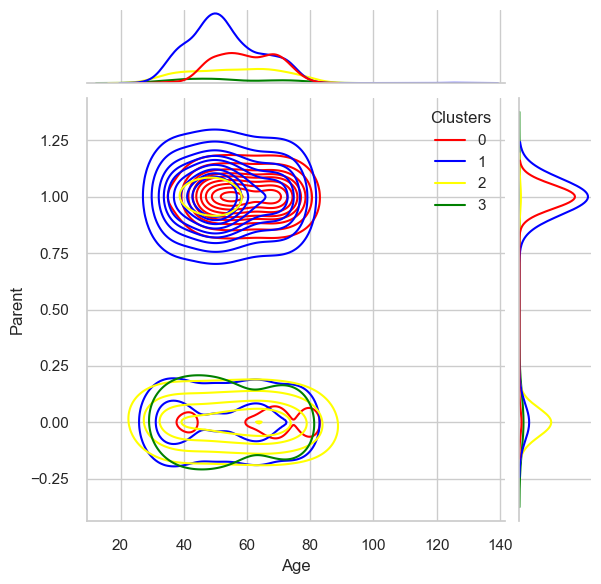

In [79]:
sns.jointplot(data = df, x='Age', y="Parent", hue="Clusters", kind="kde", palette=pal);

#### Individuals span across all Ages in all the groups, so finding a meaningful pattern is not viable

## <u>Insights and Business Recommendations</u>

### Overview of the groups

### Group 0
* wide range of income levels
* lower spending compared to their income level
* not significant response in campaigns
* highly intersted in deals
* 0-1 kid per home and 0-2 teens per home
* are definitely a parent
* At max have 4 members in family and atleast 2
* Single parent are subset of this group
* Most have a teenager at home

### Group 1
* low to moderate income
* least spending
* highest number of people in this group
* not significant response in campaigns
* highly intersted in deals
* 0-2 kids per home and 0 - 2 teens per home
* most of them are parents
* a slight majority of couples over singles

### Group 2
* moderate range of income levels
* moderate spending levels
* not significant response in campaigns
* no kids and no teens per home
* Not a parent
* At max 3 members in family
* majority have a kid (not teenagers)

### Group 3
* high income levels
* high spending
* Accepted most of the campaigns
* no kids and no teens per home
* Not a parent

### Strategies for improving campaign targeting and personalization

- Family-Focused Rewards: Offer rewards and incentives that cater to the needs of families, such as family discounts, free shipping, or exclusive access to deals. Group 0 and Group 1 can be targeted using this.
- Tiered Rewards: Implement a tiered loyalty program that offers additional benefits to frequent customers, encouraging repeat purchases. Group 1 has many number of people  highly interested in deals. Therefore if we can incentive wise this customer base into spending more, It would lead to the best ROI.
- Customers with greater income show increased responses compared to the other segments of customers revealing the direct dependency of income and response. Group 3 has highest income and highest speding and responded to the campaigns, But there are very less people in this group. Therefore, Focusing too much efforts here will not yield ROI.
- Campaign adjustment needs to be adjusted based on the customer preferences, advancement and trends.
- Partner with local schools and community organizations to offer deals for childern and teens. This would target group 0 and 1.
- Marital status also shows that single customers are the target group as they have greater response rates.
- Customers with low and high levels of education contribute to major segment of spending. So, Education level dont pay much role in spending the money. Therefore, Send timely text messages with flash sales and limited-time offers could benefit a lot.
- Targeting strategies to improve campaigning across single individuals will helps gain more response rate. Increased promotional offers will attract many groups of customers.
- Feedback- Customer value-Collecting feedbacks post campaign will help in refining the strategies.
- These insights collectively help in enhancing the return of investments and loyal customer base.

## CONCLUSION
- The analysis of the marketing campaign dataset provides a detailed understanding about the customer response rates, customer segmentation, and behavior. It also provides the list of factors affecting the response rates of the customers.
- The steps such as data cleaning, exploratory data analysis, feature engineering, predictive modeling, feature selection, and the model evaluation techniques help in understanding the accuracy rate of the target variable and help in determining the f1-score, and recall value for the model.
- This helps in identifying the trends in the market campaign data. Accuracy scores of 87.48% and 86.72% are determined in the cases of KNN and Random Forest.
- The best model to predict if the customer will respond to a campaign or not is with the help of Random forest model.
- Cluster analysis using Agglomerative clusting distinguishes the groups of customers into 4 groups thereby providing a clearer view.
- Based on the Analysis we found the characteristics of each group and provided insights into how these groups can be targeted.